In [2]:
!pip install node2vec


  Using cached node2vec-0.4.6-py3-none-any.whl (7.0 kB)
                                              0.0/59.6 kB ? eta -:--:--
     ------                                   10.2/59.6 kB ? eta -:--:--
     ------                                   10.2/59.6 kB ? eta -:--:--
     -------------------------------------- 59.6/59.6 kB 394.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=9dd9dfb7ac611b455825986b5892922830442b5d70fa2315937f0313589995af
  Stored in directory: c:\users\22779\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=a797a10bc5454b4a6789daacf13f90402c486ee03f286943309871440b95c62d
  Stored i

In [3]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import numpy as np
import random
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
%matplotlib inline


# 导入数据集

In [41]:
# 《悲惨世界》人物数据集
G = nx.les_miserables_graph()
print(f"数据节点有以下：{G.nodes}")
print(f"数据集共有{len(G)}个节点")

数据节点有以下：['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
数据集共有77个节

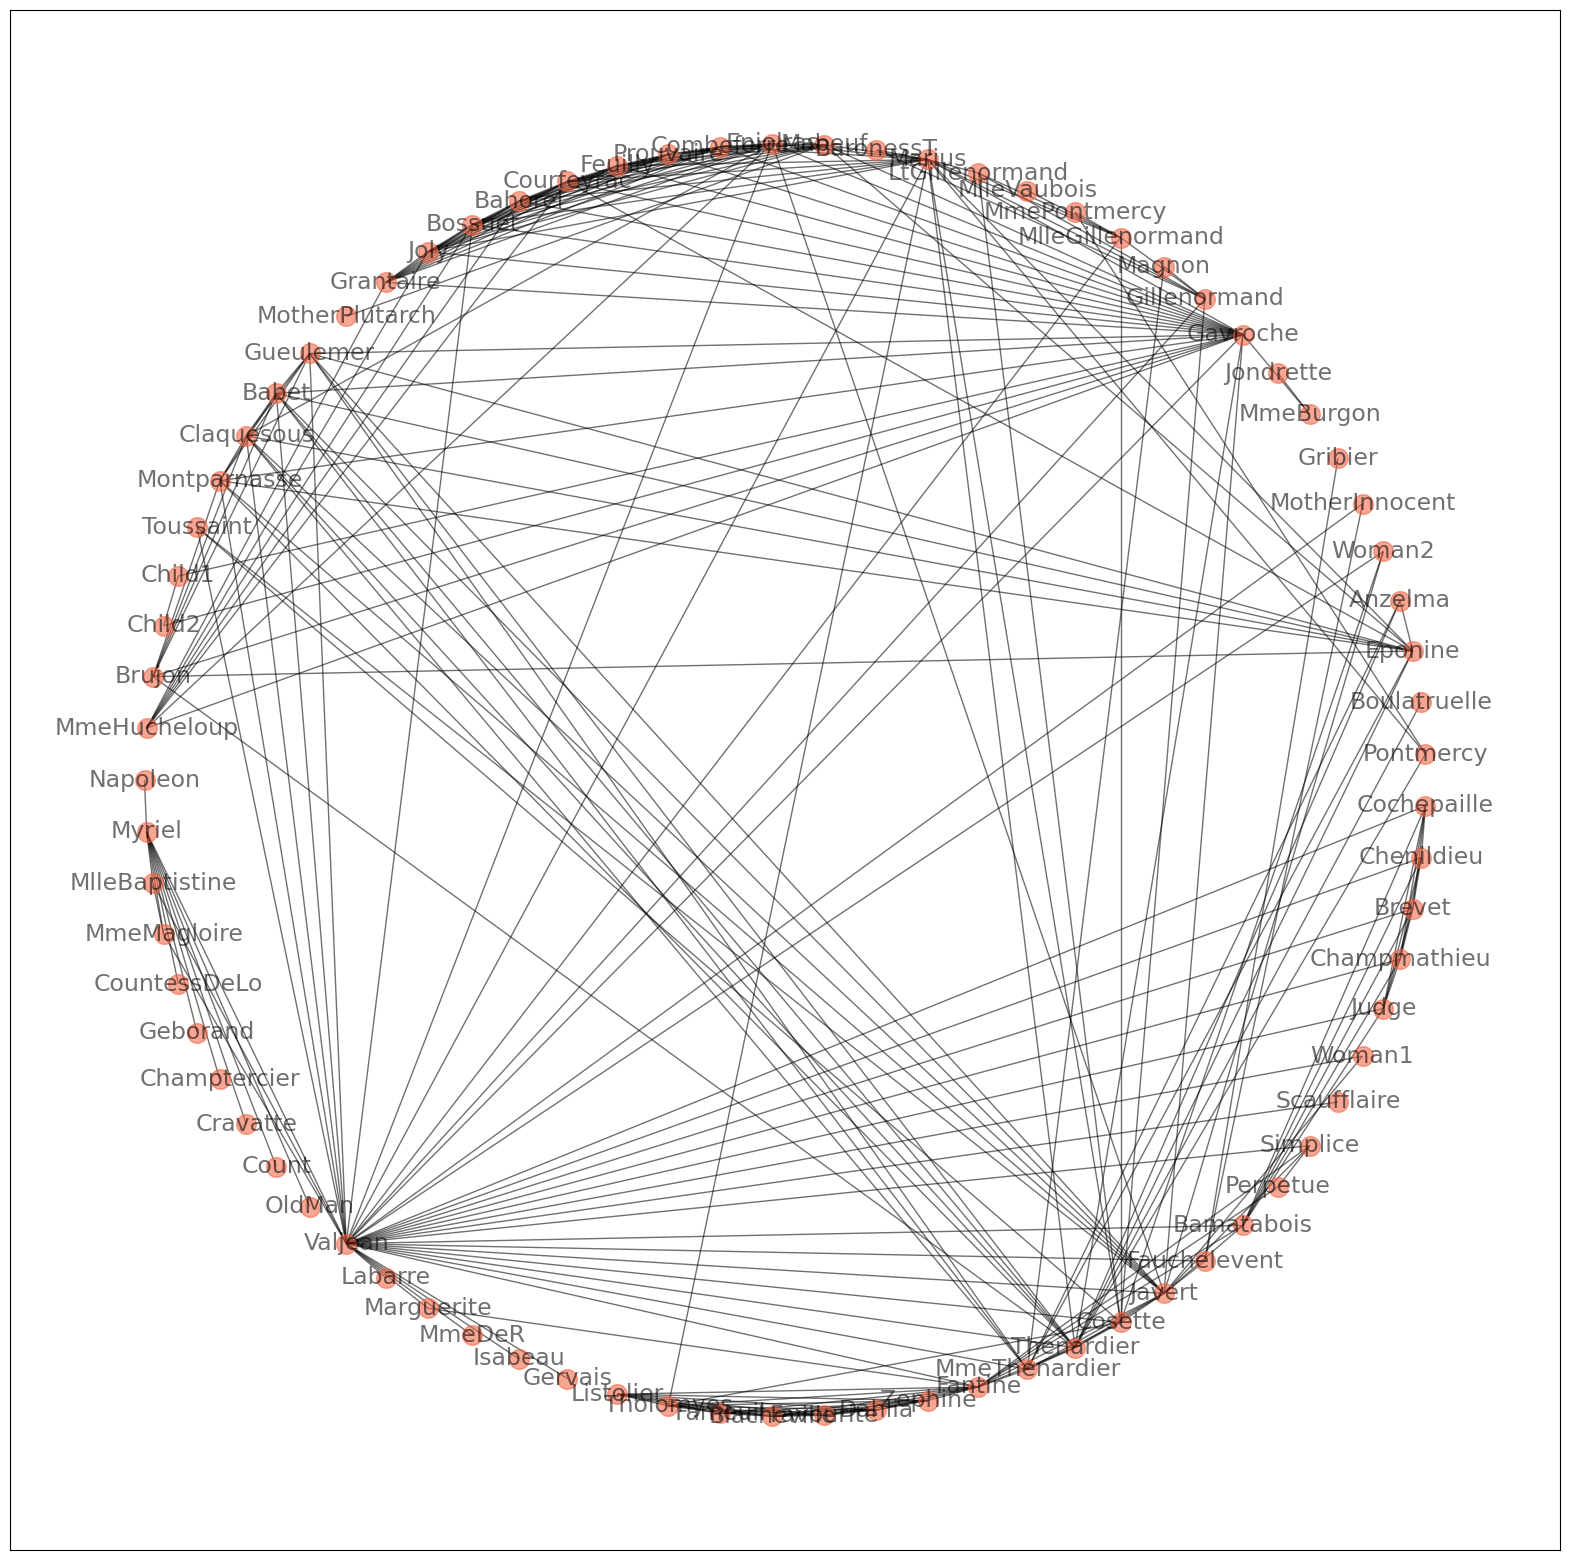

In [64]:
#查看数据模样
plt.figure(figsize=(20, 20))  # 设置图形大小
nx.draw_networkx(G, pos=nx.shell_layout(G),with_labels=True,alpha=0.56,node_size=200,node_color="#F2613F",font_size=17) # 绘制图形，显示节点标签，设置节点大小和位置
plt.show()

In [79]:
node2vec=Node2Vec(G,
                  dimensions=64,
                  p=0.2,
                  q=0.5,
                  walk_length=20,
                  num_walks=300,
                  workers=4
                 )
#p=0.2返回参数,q=3探索参数，挖掘同质社群，挖掘人际关系
model=node2vec.fit(window=10,min_count=1,batch_words=4)

#查找关系最好的几个节点

similar_nodes=model.wv.most_similar('Napoleon')
print(similar_nodes)
Interestin_node=['Napoleon', 'Myriel']
similar_nodes1=model.wv.most_similar(Interestin_node)
print(similar_nodes1)





Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

[('Count', 0.9535882472991943), ('Geborand', 0.9489757418632507), ('OldMan', 0.9489541053771973), ('Champtercier', 0.9469954967498779), ('Cravatte', 0.9376238584518433), ('CountessDeLo', 0.9317511916160583), ('MmeMagloire', 0.929271399974823), ('Myriel', 0.9189299941062927), ('MlleBaptistine', 0.9025354981422424), ('Valjean', 0.5018724203109741)]
[('Geborand', 0.9584028720855713), ('OldMan', 0.9569758772850037), ('Champtercier', 0.9555436372756958), ('MmeMagloire', 0.9530114531517029), ('Count', 0.9510777592658997), ('Cravatte', 0.9476084113121033), ('CountessDeLo', 0.9466583728790283), ('MlleBaptistine', 0.938373327255249), ('Valjean', 0.5051379203796387), ('Isabeau', 0.43537482619285583)]


In [80]:
KV=model.wv.vectors
print(KV.shape)

(77, 64)


# Edge Embedding
将graph问题转为vector处理
> kmeans聚类和Dbscan聚类

In [92]:
#kmeans，11. 先输入KV的vector向量，生成n_cluster个簇
from sklearn.cluster import KMeans
import numpy as np
cluster_labels = KMeans(n_clusters=3).fit(KV).labels_# 3个质心，fit将X作为数据集输入，划分为三个簇，然后每个簇返回一个标签
#print(cluster_labels)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 将node和KV中的节点对应

In [93]:
colors=[]
nodes=list(G.nodes)
for node in nodes:
    idx=model.wv.key_to_index[str(node)] 
    colors.append(cluster_labels[idx])
#print(colors)

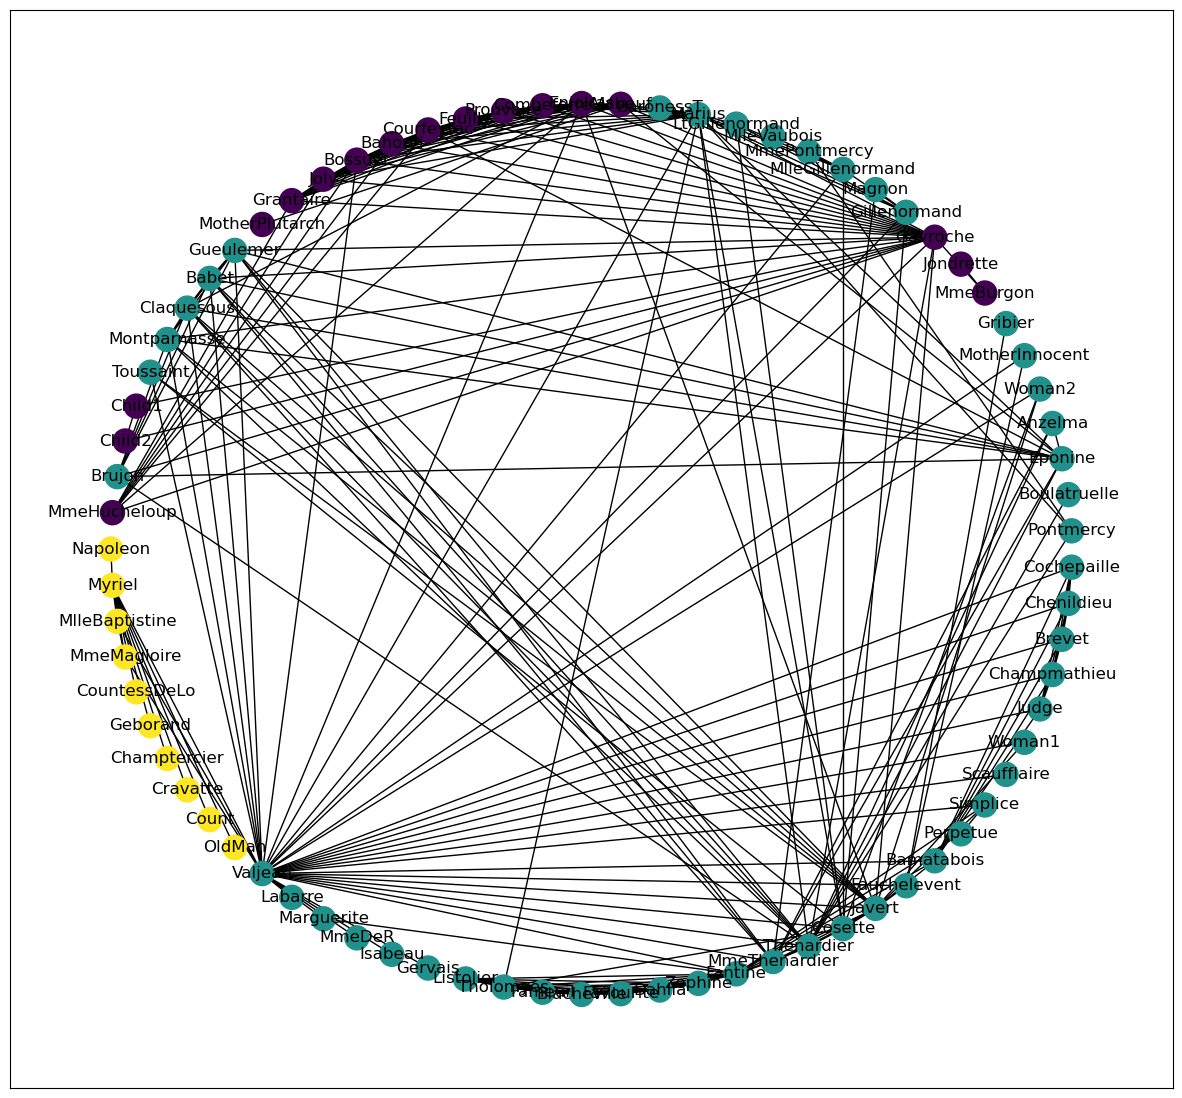

In [96]:
plt.figure(figsize=(15,14))
pos=nx.shell_layout(G)
nx.draw_networkx(G,pos,node_color=colors,with_labels=True)
plt.show()

# 查看Embedding


In [97]:
# 查看特定node的相似节点
model.wv.most_similar("Myriel")

[('MmeMagloire', 0.9377215504646301),
 ('MlleBaptistine', 0.9357805252075195),
 ('Geborand', 0.9285793900489807),
 ('OldMan', 0.9258055090904236),
 ('Champtercier', 0.9249582290649414),
 ('CountessDeLo', 0.9227957725524902),
 ('Napoleon', 0.918929934501648),
 ('Cravatte', 0.918784499168396),
 ('Count', 0.9096166491508484),
 ('Valjean', 0.48771581053733826)]

In [99]:
# 查看任意两个节点的相似度
model.wv.similarity("Labarre","OldMan")

0.3887031